# Temat testów

Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi dla:
- kobiet/mężczyzn 
- danego roku urodzenia
- danego roku studiów
- danego kierunku studiów
- danej specjalności
- wady wzroku / braku wady
- osób piszących maturę z przedmiotu X / osób nie piszących
- dominującego typu uczenia poznawczego
- ilości snu
- poziomu samopoczucia
- poziomu stresu
- poziomu zmęczenia
- umiejętności czytania map
- podzielności uwagi
- umiejętności analitycznego myślenia
- poziomu spostrzegawczości
- umiejętności czytania ze zrozumieniem
- odpowiedzi na pytanie 1 przed badaniem (preferencja A vs B)
- odpowiedzi na pytanie 1 po badaniu (preferencja A vs B)
- odpowiedzi na pytanie 2 przed badaniem (preferencja mapa, tabela, tekst, wykres)
- odpowiedzi na pytanie 2 po badaniu (preferencja mapa, tabela, tekst, wykres)
- osób które zmieniły zdanie w pytaniu 1 / osób, które nie zmieniły
- osób które zmieniły zdanie w pytaniu 2 / osób, które nie zmieniły

między grupami A vs B?


In [42]:
import pandas as pd
from functions.tests.dependent_groups.two_groups import mcnemar_test
from functions.others import choose_dominant_kind, replace_to_categories
from functions.set_preparations import prepare_row
from functions.tests.posthoc import posthoc_nemenyi

In [43]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID', usecols=['ID', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', 'SumCorr_a', 'SumCorr_b'])

df_survey = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
).fillna('NO_VAL')

df_survey = df_survey[df_survey.ID != 6] 
df_survey.set_index('ID', inplace=True)

df_survey['MAT'] = df_survey['MAT_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['POL'] = df_survey['JP_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['HIST'] = df_survey['HIST_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['Typ_uczenia'] = df_survey.apply(choose_dominant_kind, axis=1)
df_survey['Kierunek_studiów'] = df_survey['Kierunek_studiów'].apply(lambda x: 'MISMaP Geografia' if x == 'Geografia, w ramach studiów międzyobszarowych' else x)
df_survey['Samopocz'] = df_survey['Samopocz'].apply(replace_to_categories)
df_survey['Stres'] = df_survey['Stres'].apply(replace_to_categories)
df_survey['Zmęcz'] = df_survey['Zmęcz'].apply(replace_to_categories)
df_survey['Czyt_map'] = df_survey['Czyt_map'].apply(replace_to_categories)
df_survey['Podziel_uwg'] = df_survey['Podziel_uwg'].apply(replace_to_categories)
df_survey['Analit_myśl'] = df_survey['Analit_myśl'].apply(replace_to_categories)
df_survey['Spostrzeg'] = df_survey['Spostrzeg'].apply(replace_to_categories)
df_survey['Czyt_ze_zroz'] = df_survey['Czyt_ze_zroz'].apply(replace_to_categories)

df_survey.drop(columns=['Daltonizm', 'JP_podst', 'MAT_podst', 'JP_roz', 'MAT_roz', 'FIZ_roz', 'HIST_roz', 'Wzrokowiec', 'Słuchowiec', 'Kinestetyk', 'Quest1_after', 'Quest2_after', 'Rank_map', 'Rank_plt', 'Rank_tab', 'Rank_txt', 'Data', 'Godzina'], inplace=True)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/quest12.csv', usecols=['ID', 'Quest1_before', 'Quest2_before', 'Quest1_after', 'Quest2_after', 'is_change_1', 'is_change_2'], index_col='ID')

In [44]:
df_survey

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,Czyt_map,Podziel_uwg,Analit_myśl,Spostrzeg,Czyt_ze_zroz,MAT,POL,HIST,Typ_uczenia
ID,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,wysoki,wysoki,wysoki,wysoki,wysoki,VAL,VAL,NO_VAL,Kinestetyk
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,wysoki,wysoki,średni,wysoki,wysoki,VAL,VAL,NO_VAL,Brak dominującego
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,wysoki,średni,wysoki,wysoki,wysoki,VAL,NO_VAL,NO_VAL,Wzrokowiec
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,wysoki,wysoki,wysoki,wysoki,wysoki,NO_VAL,VAL,NO_VAL,Brak dominującego
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,wysoki,średni,wysoki,wysoki,wysoki,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec
7,K,2001,MISMaP Geografia,3,GEOINF,0,7,wysoki,niski,średni,wysoki,wysoki,średni,średni,wysoki,VAL,NO_VAL,VAL,Brak dominującego
11,M,2003,Geografia,1,GEOINF,0,8<,wysoki,niski,niski,wysoki,średni,średni,wysoki,niski,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec
12,K,2003,Geografia,1,FIZ,0,8<,niski,średni,niski,średni,niski,średni,średni,średni,VAL,NO_VAL,NO_VAL,Brak dominującego
13,K,2004,Geografia,1,FIZ,0,8<,wysoki,niski,niski,wysoki,niski,średni,wysoki,niski,VAL,NO_VAL,NO_VAL,Wzrokowiec


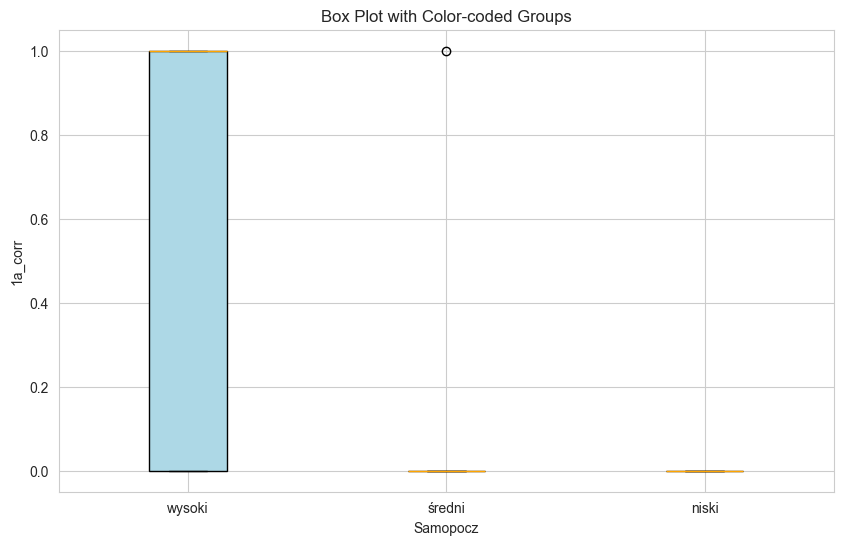

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge dataframes
merged_df = pd.merge(df_answers, df_survey, how='inner', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_quest, how='inner', left_index=True, right_index=True)
merged_df['sum_3'] = merged_df['3a_corr'] + merged_df['3b_corr']
# Box plot with color-coded groups based on 'Samopocz' column
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df[merged_df['Samopocz'] == category]['3a_corr'] for category in merged_df['Samopocz'].unique()],
            labels=merged_df['Samopocz'].unique(),
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='orange'))

# Set plot labels and title
plt.xlabel('Samopocz')
plt.ylabel('1a_corr')
plt.title('Box Plot with Color-coded Groups')

# Show the plot
plt.show()



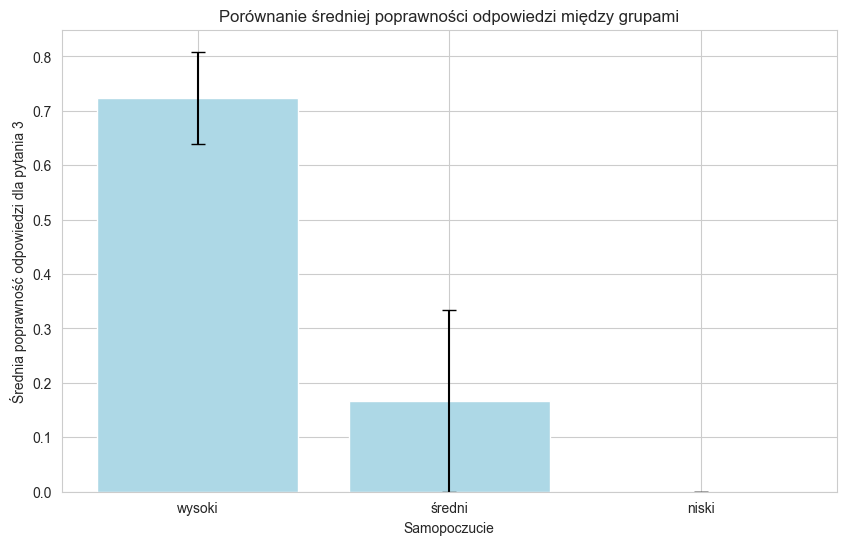

In [46]:
import matplotlib.pyplot as plt

# Przykładowe dane (dostosuj do rzeczywistych danych)
categories = merged_df['Samopocz'].unique()
mean_accuracy = [merged_df[merged_df['Samopocz'] == category]['3a_corr'].mean() for category in categories]
std_error = [merged_df[merged_df['Samopocz'] == category]['3a_corr'].std() / len(merged_df[merged_df['Samopocz'] == category]) ** 0.5 for category in categories]

# Wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_accuracy, yerr=std_error, color='lightblue', capsize=5)

# Ustawienia osi i tytułu
plt.xlabel('Samopoczucie')
plt.ylabel('Średnia poprawność odpowiedzi dla pytania 3')
plt.title('Porównanie średniej poprawności odpowiedzi między grupami')

# Pokaż wykres
plt.show()


/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1178/3024694420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')


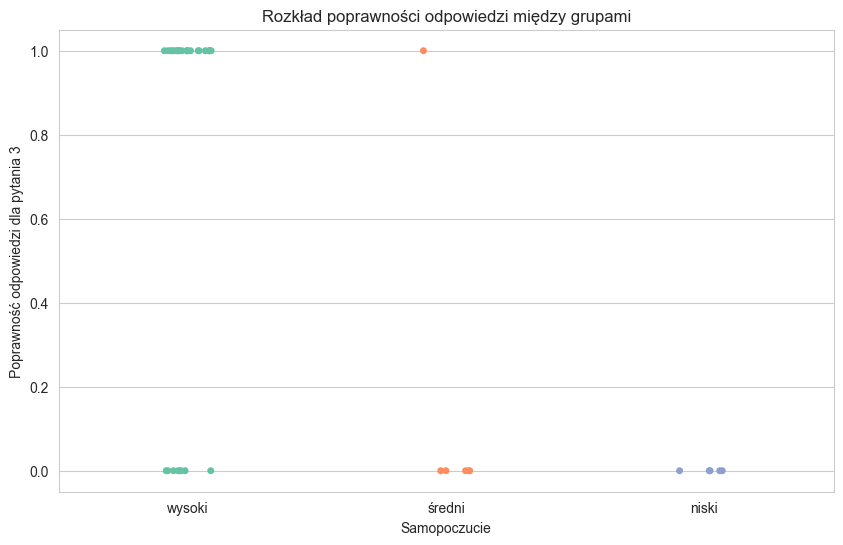

In [47]:
import seaborn as sns

# Wykres punktowy
plt.figure(figsize=(10, 6))
sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')

# Ustawienia osi i tytułu
plt.xlabel('Samopoczucie')
plt.ylabel('Poprawność odpowiedzi dla pytania 3')
plt.title('Rozkład poprawności odpowiedzi między grupami')

# Pokaż wykres
plt.show()


/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1178/218087034.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')


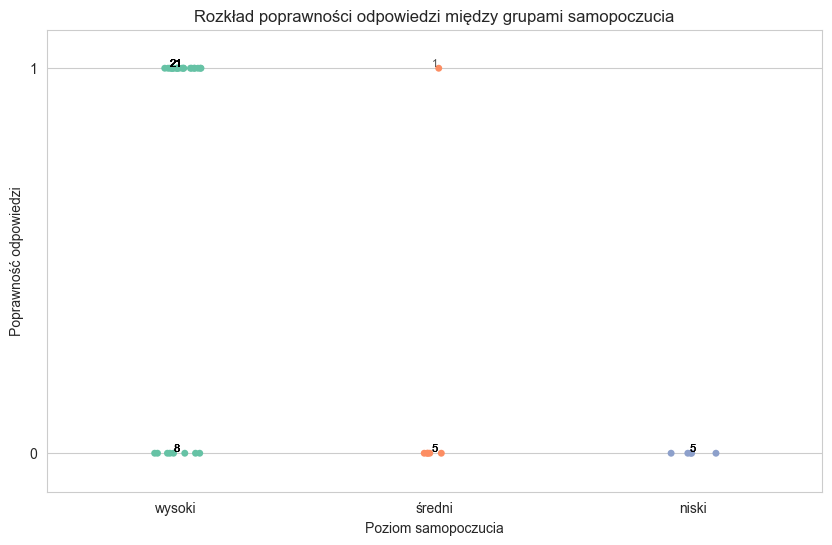

In [48]:
import seaborn as sns
import seaborn as sns

# Wykres punktowy
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')

# Ograniczenie osi pionowej do 0 i 1
plt.ylim(-0.1, 1.1)

# Podpisanie liczby kropek na wykresie
for category in merged_df['Samopocz'].unique():
    y_values = merged_df[merged_df['Samopocz'] == category]['3a_corr']
    x_positions = [category] * len(y_values)
    
    count_0 = sum(1 for value in y_values if value == 0)
    count_1 = sum(1 for value in y_values if value == 1)
    
    for x, y in zip(x_positions, y_values):
        ax.text(x, y, str(count_0) if y == 0 else str(count_1), ha='center', va='bottom', fontsize=8, color='black', alpha=0.7)

plt.yticks([0, 1])
# Ustawienia osi i tytułu
plt.xlabel('Poziom samopoczucia')
plt.ylabel('Poprawność odpowiedzi')
plt.title('Rozkład poprawności odpowiedzi między grupami samopoczucia')

# Pokaż wykres
plt.show()


/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1178/1650624854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1178/1650624854.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.stripplot(x='Samopocz', y='3b_corr', data=merged_df, jitter=True, palette='Set2')


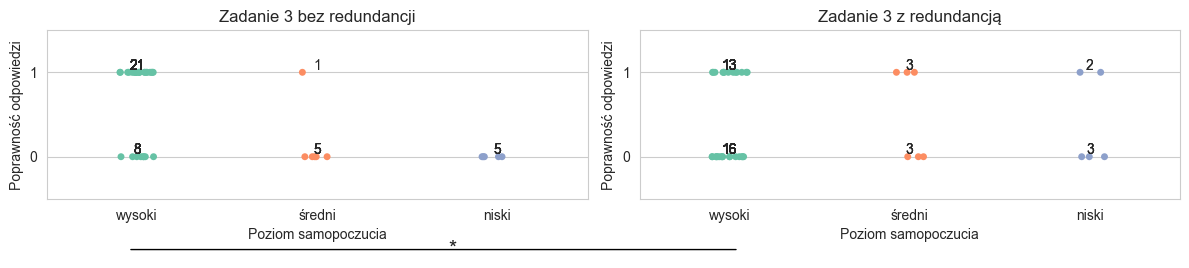

In [90]:
import seaborn as sns

# Wykres punktowy
plt.figure(figsize=(12, 3))

sns.set_style('whitegrid')
# Pierwszy subplot dla '1a_corr'
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.xticks([0,1,2], ['wysoki', 'średni', 'niski'])
plt.xlabel('Poziom samopoczucia')
plt.ylabel('Poprawność odpowiedzi')
plt.title('Zadanie 3 bez redundancji')
plt.annotate(
    '', xy=(0.15, -0.3), xycoords='axes fraction', xytext=(1.28, -0.3),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.75, -0.35), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

# Podpisanie liczby kropek na wykresie dla '1a_corr'
for category in merged_df['Samopocz'].unique():
    y_values = merged_df[merged_df['Samopocz'] == category]['3a_corr']
    x_positions = [category] * len(y_values)
    count_0 = sum(1 for value in y_values if value == 0)
    count_1 = sum(1 for value in y_values if value == 1)
    
    for x, y in zip(x_positions, y_values):
        ax1.text(x, y, str(count_0) if y == 0 else str(count_1), ha='center', va='bottom', fontweight='light', fontsize=10)

# Drugi subplot dla '1b_corr'
plt.subplot(1, 2, 2)
ax2 = sns.stripplot(x='Samopocz', y='3b_corr', data=merged_df, jitter=True, palette='Set2')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.xlabel('Poziom samopoczucia')
plt.ylabel('Poprawność odpowiedzi')
plt.title('Zadanie 3 z redundancją')

# Podpisanie liczby kropek na wykresie dla '1b_corr'
for category in merged_df['Samopocz'].unique():
    y_values = merged_df[merged_df['Samopocz'] == category]['3b_corr']
    x_positions = [category] * len(y_values)
    count_0 = sum(1 for value in y_values if value == 0)
    count_1 = sum(1 for value in y_values if value == 1)
    
    for x, y in zip(x_positions, y_values):
        ax2.text(x, y, str(count_0) if y == 0 else str(count_1), ha='center', va='bottom', fontweight='light', fontsize=10)

# Dostosowanie odstępów między subplotami
plt.tight_layout()

# Pokaż wykres
plt.show()



In [50]:
# utworzenie kolekcji
df_coll = pd.concat([df_quest] * 3, ignore_index=True)
df_surveyColl = pd.concat([df_survey] * 3, ignore_index=True)
df_coll = df_coll.join(df_surveyColl)
df_coll["corrA"] = prepare_row(df_answers.filter(regex='.*a_corr$'))
df_coll["corrB"] = prepare_row(df_answers.filter(regex='.*b_corr$'))
df_coll.head()

,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,...,Podziel_uwg,Analit_myśl,Spostrzeg,Czyt_ze_zroz,MAT,POL,HIST,Typ_uczenia,corrA,corrB
0,B,wykres,B,wykres,False,False,M,2002,MISMaP Geografia,2,...,wysoki,wysoki,wysoki,wysoki,VAL,VAL,NO_VAL,Kinestetyk,1,1
1,B,wykres,B,wykres,False,False,M,2003,Gospodarka przestrzenna,1,...,wysoki,średni,wysoki,wysoki,VAL,VAL,NO_VAL,Brak dominującego,1,1
2,B,mapa,B,mapa,False,False,M,2001,Geografia,3,...,średni,wysoki,wysoki,wysoki,VAL,NO_VAL,NO_VAL,Wzrokowiec,1,1
3,B,mapa,B,wykres,False,True,K,2000,Geografia,3,...,wysoki,wysoki,wysoki,wysoki,NO_VAL,VAL,NO_VAL,Brak dominującego,1,1
4,B,tabela,B,tabela,False,False,K,2002,Geografia,3,...,średni,wysoki,wysoki,wysoki,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec,1,1


In [51]:
# utworzenie sum
df_sum = df_survey.merge(df_quest, on='ID')
df_sum['corrA'] = df_answers['SumCorr_a']
df_sum['corrB'] = df_answers['SumCorr_b']
df_sum.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,corrA,corrB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,2,2
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,2,3
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,2,2
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,3,2
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,3,3


In [52]:
# utworzenie par
df_1 = df_survey.merge(df_quest, on='ID')
df_1['corrA'] = df_answers['1a_corr']
df_1['corrB'] = df_answers['1b_corr']

df_2 = df_survey.merge(df_quest, on='ID')
df_2['corrA'] = df_answers['2a_corr']
df_2['corrB'] = df_answers['2b_corr']

df_3 = df_survey.merge(df_quest, on='ID')
df_3['corrA'] = df_answers['3a_corr']
df_3['corrB'] = df_answers['3b_corr']
df_3.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,corrA,corrB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,1,1
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,0,1
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,0,0
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,1,0
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,1,1


In [53]:
dfs = [df_coll, df_sum, df_1, df_2, df_3]
names = {
    1: 'Kolekcja',
    2: 'Suma',
    3: '1',
    4: '2',
    5: '3'
}

H0: Brak istotnych statystycznie różnic w poprawności odpowiedzi między grupami A i B dla cechy X (np. kobiet/mężczyzn). 

H1: Istnieje istotna statystycznie różnica w poprawności odpowiedzi między grupami A i B dla cechy X (np. kobiet/mężczyzn). 

In [54]:
ALPHA = 0.05

In [55]:
results = []
def conduct_test(col, results=results):
    groups = df_1[col].unique()
    results.append('\n')
    results.append(col)
    groupsStr = ''
    for group in groups:
        groupsStr += f"{group} "
    print(f'Groups: {groups}')
    for i, df in enumerate(dfs):
        test_dfs = [pd.DataFrame(data={
            'A': df['corrA'][df[col] == group], 
            'B': df['corrB'][df[col] == group]
        }) for group in groups]
    
        print('-------------------------------')
        print('Image:', names[i+1])
        for i in range(len(test_dfs)):
            print('Group:', groups[i])
            p = mcnemar_test(test_dfs[i], 'A', 'B', yate_flag=True, alpha=ALPHA)
            results.append(p)
            print('----------')
    results.append(groupsStr)

In [56]:
# płeć
col = 'Płeć'
conduct_test(col)

Groups: ['M' 'K']
-------------------------------
Image: Kolekcja
Group: M
B  0   1
A       
0  6   5
1  8  32
McNemar statistic: 5.0
p-value: 0.5810546875
Brak podstaw do odrzucenia H0.
----------
Group: K
B   0   1
A        
0  16   8
1   6  39
McNemar statistic: 6.0
p-value: 0.79052734375
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: M
B  1  2  3
A         
1  1  1  0
2  1  3  3
3  0  6  2
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: K
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  4  0
2  0  2  5  2
3  0  0  2  5
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: M
B  0   1
A       
1  1  16
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: K
B  0   1
A       
0  2   3
1  0  18
McNemar statistic: 0.0
p-value: 0.25
Brak podstaw do odrzucenia H0.
----------
-----------------------------

In [57]:
# rok urodzenia
col = 'Rok_urodzenia'
conduct_test(col)

Groups: [2002 2003 2001 2000 2004]
-------------------------------
Image: Kolekcja
Group: 2002
B  0   1
A       
0  6   3
1  5  19
McNemar statistic: 3.0
p-value: 0.7265625
Brak podstaw do odrzucenia H0.
----------
Group: 2003
B  0   1
A       
0  9   9
1  5  28
McNemar statistic: 5.0
p-value: 0.4239501953125
Brak podstaw do odrzucenia H0.
----------
Group: 2001
B  0   1
A       
0  7   1
1  2  14
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 2000
B  0  1
A      
1  1  2
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 2004
B  0  1
A      
1  1  8
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 2002
B  1  2  3
A         
1  1  1  0
2  0  5  0
3  0  3  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 2003
B  1  2  3
A         
1  2  3  0
2  1  2  5
3  0  3  1
McNemar statistic: 1.0
p-value: 0.625

In [58]:
# rok studiów
col = 'Rok_studiów'
conduct_test(col)

Groups: [2 1 3]
-------------------------------
Image: Kolekcja
Group: 2
B  0   1
A       
0  4   2
1  4  14
McNemar statistic: 2.0
p-value: 0.6875
Brak podstaw do odrzucenia H0.
----------
Group: 1
B   0   1
A        
0  14  10
1   7  38
McNemar statistic: 7.0
p-value: 0.629058837890625
Brak podstaw do odrzucenia H0.
----------
Group: 3
B  0   1
A       
0  4   1
1  3  19
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 2
B  2
A   
1  1
2  4
3  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 1
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  3  0
2  0  1  3  5
3  0  0  4  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 3
B  1  2  3
A         
1  0  1  0
2  2  1  0
3  0  1  4
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: 2
B  1
A   
1  8
Only one s

In [59]:
# kierunek studiów
col = 'Kierunek_studiów'
conduct_test(col)

Groups: ['MISMaP Geografia' 'Gospodarka przestrzenna' 'Geografia']
-------------------------------
Image: Kolekcja
Group: MISMaP Geografia
B  0  1
A      
0  1  0
1  1  7
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Gospodarka przestrzenna
B  0  1
A      
0  3  2
1  2  8
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Geografia
B   0   1
A        
0  18  11
1  11  56
McNemar statistic: 11.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: MISMaP Geografia
B  2  3
A      
2  1  0
3  1  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Gospodarka przestrzenna
B  1  2  3
A         
1  1  0  0
2  1  0  2
3  0  1  0
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Geografia
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  5  0
2  0  2  7  3
3  0  0  6  6
McNemar statistic: 0.0
p-value:

In [60]:
# specjalność
col = 'Specjalność'
conduct_test(col)

Groups: ['SPOŁ-EKO' 'NO_VAL' 'GEOINF ' 'FIZ ']
-------------------------------
Image: Kolekcja
Group: SPOŁ-EKO
B  0   1
A       
0  4   3
1  2  15
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  0  1
A      
0  3  2
1  2  8
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: GEOINF 
B  0   1
A       
0  9   4
1  7  34
McNemar statistic: 4.0
p-value: 0.548828125
Brak podstaw do odrzucenia H0.
----------
Group: FIZ 
B  0   1
A       
0  6   4
1  3  14
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: SPOŁ-EKO
B  2  3
A      
1  1  0
2  4  1
3  1  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  1  2  3
A         
1  1  0  0
2  1  0  2
3  0  1  0
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: GEOINF 
B  1  2  3
A         
1  1  3  0
2  2  3  0
3  0

In [61]:
# wady wzroku
col = 'Wady_wzroku'
conduct_test(col)

Groups: [0 1]
-------------------------------
Image: Kolekcja
Group: 0
B  0   1
A       
0  8   4
1  6  30
McNemar statistic: 4.0
p-value: 0.75390625
Brak podstaw do odrzucenia H0.
----------
Group: 1
B   0   1
A        
0  14   9
1   8  41
McNemar statistic: 8.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 0
B  1  2  3
A         
1  2  1  0
2  1  4  1
3  0  3  4
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 1
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  4  0
2  0  2  4  4
3  0  0  5  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: 0
B  0   1
A       
0  1   1
1  1  13
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 1
B  0   1
A       
0  1   2
1  0  21
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image

In [62]:
# matura POL - pisał / nie pisał
col = 'POL'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Kolekcja
Group: VAL
B  0   1
A       
0  4   5
1  3  15
McNemar statistic: 3.0
p-value: 0.7265625
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B   0   1
A        
0  18   8
1  11  56
McNemar statistic: 8.0
p-value: 0.6476058959960938
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: VAL
B  2  3
A      
1  2  0
2  3  2
3  2  0
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  3  0
2  0  3  5  3
3  0  0  6  7
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: VAL
B  1
A   
0  1
1  8
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  0   1
A       
0  2   2
1  1  26
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
----------------------

In [63]:
# matura MAT - pisał / nie pisał
col = 'MAT'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Kolekcja
Group: VAL
B   0   1
A        
0  12   6
1   8  40
McNemar statistic: 6.0
p-value: 0.79052734375
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B   0   1
A        
0  10   7
1   6  31
McNemar statistic: 6.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: VAL
B  1  2  3
A         
1  2  2  0
2  3  4  3
3  0  4  4
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  4  2
3  0  0  4  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: VAL
B  0   1
A       
0  1   0
1  0  21
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
B  0   1
A       
0  1   3
1  1  13
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
-------

In [64]:
# matura HIST - pisał / nie pisał
col = 'HIST'
conduct_test(col)

Groups: ['NO_VAL' 'VAL']
-------------------------------
Image: Kolekcja
Group: NO_VAL
B   0   1
A        
0  22  12
1  11  63
McNemar statistic: 11.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: VAL
B  0  1
A      
0  0  1
1  3  8
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  5  0
2  0  3  7  5
3  0  0  6  6
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: VAL
B  2  3
A      
2  1  0
3  2  1
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: NO_VAL
B  0   1
A       
0  2   3
1  1  30
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
Group: VAL
B  1
A   
1  4
Only one sample
----------
-------------------------------
Image: 2
Group: NO_VAL
B  0   1
A       
0  8   3
1  2  23
McNemar statist

In [65]:
# dominujący typ uczenia
col = 'Typ_uczenia'
conduct_test(col)

Groups: ['Kinestetyk' 'Brak dominującego' 'Wzrokowiec' 'Słuchowiec']
-------------------------------
Image: Kolekcja
Group: Kinestetyk
B  0  1
A      
0  2  0
1  0  4
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Brak dominującego
B  0   1
A       
0  4   3
1  3  20
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Wzrokowiec
B   0   1
A        
0  11   9
1   7  39
McNemar statistic: 7.0
p-value: 0.803619384765625
Brak podstaw do odrzucenia H0.
----------
Group: Słuchowiec
B  0  1
A      
0  5  1
1  4  8
McNemar statistic: 1.0
p-value: 0.375
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: Kinestetyk
B  2
A   
2  2
Only one sample
----------
Group: Brak dominującego
B  1  2  3
A         
1  1  1  0
2  0  2  1
3  0  2  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Wzrokowiec
B  1  2  3
A         
1  2  4  0
2  2  2  4
3  0  4  4
M

In [66]:
# ilość snu
col = 'Ilość_snu'
conduct_test(col)

Groups: ['6' '<6' '8' '7' '8<']
-------------------------------
Image: Kolekcja
Group: 6
B  0   1
A       
0  9   2
1  2  20
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: <6
B  0   1
A       
0  5   6
1  2  17
McNemar statistic: 2.0
p-value: 0.2890625
Brak podstaw do odrzucenia H0.
----------
Group: 8
B  0  1
A      
0  1  0
1  2  9
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
Group: 7
B  0   1
A       
0  2   3
1  4  18
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 8<
B  0  1
A      
0  5  2
1  4  7
McNemar statistic: 2.0
p-value: 0.6875
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 6
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  0  0
2  0  1  3  2
3  0  0  1  2
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: <6
B  1  2  3
A         
1  0  4  0
2  1  0  2
3  0  1  2
McNemar statistic: 1.0

In [67]:
# samopoczucie
col = 'Samopocz'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
B   0   1
A        
0  11   6
1  13  57
McNemar statistic: 6.0
p-value: 0.1670684814453125
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0  1
A      
0  5  4
1  1  8
McNemar statistic: 1.0
p-value: 0.375
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0  1
A      
0  6  3
1  0  6
McNemar statistic: 0.0
p-value: 0.25
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  1  2  3
A         
1  1  1  0
2  3  8  2
3  0  7  7
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  1  3  0
2  0  0  1
3  0  1  0
McNemar statistic: 0.0
p-value: 0.25
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  0  0  2
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-----------------

In [84]:
from functions.tests.posthoc import posthocNemenyi_test
posthoc_nemenyi(df_sum, 'Samopocz', 'corrA', 'corrB')

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


In [69]:
# stres
col = 'Stres'
conduct_test(col)

Groups: ['niski' 'średni' 'wysoki']
-------------------------------
Image: Kolekcja
Group: niski
B   0   1
A        
0  10   7
1   9  46
McNemar statistic: 7.0
p-value: 0.803619384765625
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0   1
A       
0  5   3
1  3  16
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
B  0  1
A      
0  7  3
1  2  9
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: niski
B  1  2  3
A         
1  1  2  0
2  2  6  3
3  0  5  5
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  1  1  0
2  1  2  1
3  0  1  2
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  2  0
2  0  0  0  1
3  0  0  2  0
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
------

In [70]:
# zmęczenie
col = 'Zmęcz'
conduct_test(col)

Groups: ['średni' 'niski' 'wysoki']
-------------------------------
Image: Kolekcja
Group: średni
B  0   1
A       
0  5   4
1  3  18
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0   1
A       
0  8   6
1  8  32
McNemar statistic: 6.0
p-value: 0.79052734375
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
B  0   1
A       
0  9   3
1  3  21
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: średni
B  1  2  3
A         
1  0  1  0
2  2  2  3
3  0  1  1
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  1  2  3
A         
1  2  1  0
2  1  5  2
3  0  4  3
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  1  0
3  0  0  3  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
----------

In [71]:
# czytanie map
col = 'Czyt_map'
conduct_test(col)

Groups: ['wysoki' 'średni']
-------------------------------
Image: Kolekcja
Group: wysoki
B   0   1
A        
0  19  11
1  12  63
McNemar statistic: 11.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0  1
A      
0  3  2
1  2  8
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  4  0
2  0  3  7  5
3  0  0  7  6
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  1  1  0
2  0  1  0
3  0  1  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  2   3
1  1  29
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1
A   
1  5
Only one sample
----------
-------------------------------
Image: 2
Group: wysoki
B  0   1
A       


In [72]:
# podzielność uwagi
col = 'Podziel_uwg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
B  0   1
A       
0  8   4
1  7  32
McNemar statistic: 4.0
p-value: 0.548828125
Brak podstaw do odrzucenia H0.
----------
Group: średni
B   0   1
A        
0  10   6
1   2  24
McNemar statistic: 2.0
p-value: 0.2890625
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0   1
A       
0  4   3
1  5  15
McNemar statistic: 3.0
p-value: 0.7265625
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  1  2  3
A         
1  1  1  0
2  3  2  3
3  0  4  3
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  3  2
3  0  0  1  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  1  2  3
A         
1  1  1  0
2  0  3  0
3  0  3  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
-----

In [73]:
# analityczne myślenie
col = 'Analit_myśl'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
B   0   1
A        
0  16   8
1  10  50
McNemar statistic: 8.0
p-value: 0.8145294189453125
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0   1
A       
0  5   4
1  4  20
McNemar statistic: 4.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0  1
A      
0  1  1
1  0  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  4  0
2  0  3  4  4
3  0  0  7  4
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  2  0  0
2  0  4  1
3  0  1  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  2
A   
1  1
Only one sample
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  2   2
1  0  24
McNem

In [74]:
# spostrzegawczość
col = 'Spostrzeg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
B   0   1
A        
0  14   8
1   9  44
McNemar statistic: 8.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0   1
A       
0  7   4
1  3  19
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0  1
A      
0  1  1
1  2  8
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  2  0
2  0  1  6  4
3  0  0  6  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  1  2  0
2  2  2  1
3  0  0  3
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  2  3
A      
1  1  0
3  2  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Gr

In [75]:
# czytanie ze zrozumieniem
col = 'Czyt_ze_zroz'
conduct_test(col)

Groups: ['wysoki' 'niski' 'średni']
-------------------------------
Image: Kolekcja
Group: wysoki
B   0   1
A        
0  13   6
1   8  48
McNemar statistic: 6.0
p-value: 0.79052734375
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  0   1
A       
0  5   4
1  5  13
McNemar statistic: 4.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  0   1
A       
0  4   3
1  1  10
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  2  6  4
3  0  0  5  5
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: niski
B  1  2  3
A         
1  1  2  0
2  1  2  0
3  0  2  1
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: średni
B  1  2  3
A         
1  1  2  0
2  0  0  1
3  0  1  1
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
----

In [76]:
# pytanie 1 - preferencja A vs B  - przed badaniem
col = 'Quest1_before'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Kolekcja
Group: B
B   0   1
A        
0  21  12
1  12  63
McNemar statistic: 12.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: A
B  0  1
A      
0  1  1
1  2  8
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: B
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  4  0
2  0  3  8  5
3  0  0  6  6
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: A
B  2  3
A      
1  1  0
3  2  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: B
B  0   1
A       
0  2   2
1  1  31
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: A
B  1
A   
0  1
1  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: B
B  0   1
A       
0  8   4
1  2 

In [77]:
# pytanie 1 - preferencja A vs B  - po badaniu
col = 'Quest1_after'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Kolekcja
Group: B
B   0   1
A        
0  12  11
1   9  55
McNemar statistic: 9.0
p-value: 0.8238029479980469
Brak podstaw do odrzucenia H0.
----------
Group: A
B   0   1
A        
0  10   2
1   5  16
McNemar statistic: 2.0
p-value: 0.453125
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: B
B  1  2  3
A         
1  2  4  0
2  1  5  5
3  0  6  6
McNemar statistic: 1.0
p-value: 0.375
Brak podstaw do odrzucenia H0.
----------
Group: A
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  2  3  0
3  0  0  2  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: B
B  0   1
A       
0  0   1
1  1  27
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: A
B  0  1
A      
0  2  2
1  0  7
McNemar statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
------------------

In [78]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - przed badaniem
col = 'Quest2_before'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Kolekcja
Group: wykres
B  0   1
A       
0  5   3
1  2  17
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: mapa
B   0   1
A        
0  12   8
1   9  34
McNemar statistic: 8.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: tabela
B  0   1
A       
0  5   1
1  1  14
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: tekst
B  0  1
A      
0  0  1
1  2  6
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wykres
B  1  2  3
A         
1  0  1  0
2  2  2  2
3  0  0  2
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: mapa
B  1  2  3
A         
1  3  3  0
2  1  4  3
3  0  6  1
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
Group: tabela
B  0  2  3
A         
0  1  0  0
1  0  1  0
2  0

In [79]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - po badaniu
col = 'Quest2_after'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Kolekcja
Group: wykres
B  0   1
A       
0  6   4
1  6  29
McNemar statistic: 4.0
p-value: 0.75390625
Brak podstaw do odrzucenia H0.
----------
Group: mapa
B   0   1
A        
0  14   6
1   6  28
McNemar statistic: 6.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: tabela
B  0   1
A       
0  1   2
1  2  13
McNemar statistic: 2.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: tekst
B  0  1
A      
0  1  1
1  0  1
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wykres
B  1  2  3
A         
1  2  1  0
2  0  2  2
3  0  5  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: mapa
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  2  6  1
3  0  0  2  2
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: tabela
B  1  2  3
A  

In [80]:
# pytanie 1 - preferencja A vs B  - zmiana zdania
col = 'is_change_1'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Kolekcja
Group: False
B   0   1
A        
0  13  12
1  11  57
McNemar statistic: 11.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: True
B  0   1
A       
0  9   1
1  3  14
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: False
B  1  2  3
A         
1  2  5  0
2  1  5  5
3  0  8  5
McNemar statistic: 1.0
p-value: 0.21875
Brak podstaw do odrzucenia H0.
----------
Group: True
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  0  0
2  0  2  3  0
3  0  0  0  2
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: False
B  0   1
A       
0  0   2
1  1  28
McNemar statistic: 1.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: True
B  0  1
A      
0  2  1
1  0  6
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
------------

In [81]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - zmiana zdania
col = 'is_change_2'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Kolekcja
Group: False
B  0   1
A       
0  9   5
1  3  31
McNemar statistic: 3.0
p-value: 0.7265625
Brak podstaw do odrzucenia H0.
----------
Group: True
B   0   1
A        
0  13   8
1  11  40
McNemar statistic: 8.0
p-value: 0.6476058959960938
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: False
B  1  2  3
A         
1  1  3  0
2  0  5  1
3  0  2  4
McNemar statistic: 0.0
p-value: 0.25
Brak podstaw do odrzucenia H0.
----------
Group: True
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  2  0
2  0  3  3  4
3  0  0  6  3
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: False
B   1
A    
0   3
1  13
McNemar statistic: 0.0
p-value: 0.25
Brak podstaw do odrzucenia H0.
----------
Group: True
B  0   1
A       
0  2   0
1  1  21
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
----

Podsumowanie:
Istotne statystycznie:
- Samopoczucie: grafiki 3 (poziom samopoczucia - wysoki, na korzyść A)

In [82]:
import csv
with open('./results/corr_cechy_osobowe.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    row = []
    for item in results:
        if item != '\n':
            row.append(item)
        else:
            writer.writerow(row)
            row = []
    if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
        writer.writerow(row)